In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load Dataset

df = pd.read_csv(r"C:\Users\ADMIN\Loan_Train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Exploratory Data Analysis

print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000

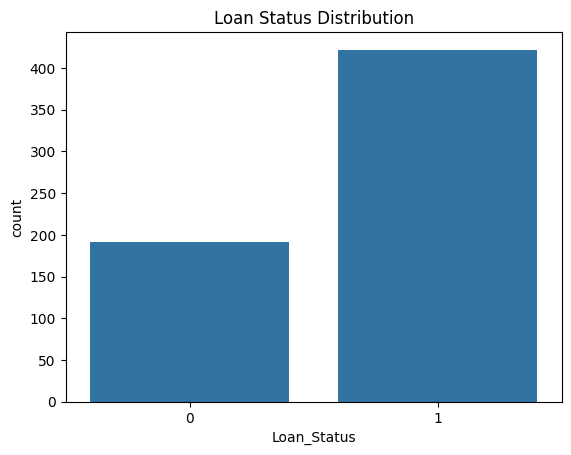

In [15]:
# Visualize target variable
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

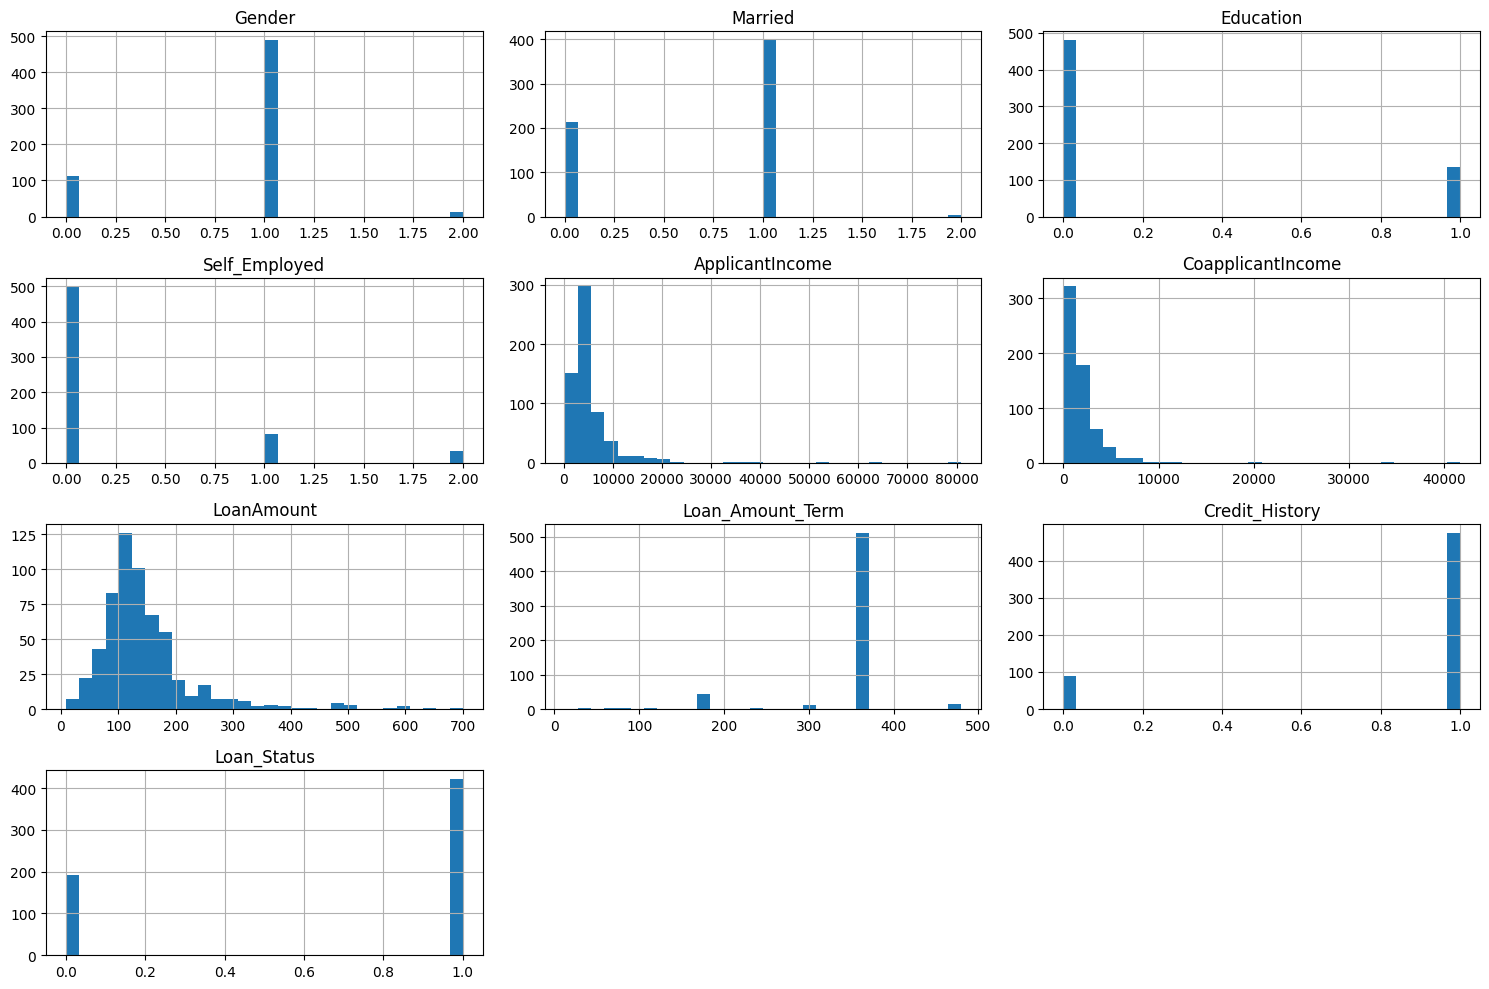

In [16]:
# Visualize numeric variables
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [18]:
# Encode categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    if column in df.columns:
        df[column] = le.fit_transform(df[column])

# Drop irrelevant columns only if they exist
if 'Loan_ID' in df.columns:
    df.drop(['Loan_ID'], axis=1, inplace=True)


In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [20]:
# 1. Drop target and create X, y
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# 2. Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# 3. Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [21]:
# Check dtypes before encoding
print(X.dtypes)

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Re-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values
print(X_train.isnull().sum().sum())
print(y_train.isnull().sum())

# Fill missing if needed
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Train model
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter=1000)
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)


Gender                       int64
Married                      int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object
68
0


LogisticRegression(max_iter=1000, solver='liblinear')

In [22]:
# make predictions

y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Full Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7479674796747967
Confusion Matrix:
 [[18 25]
 [ 6 74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123



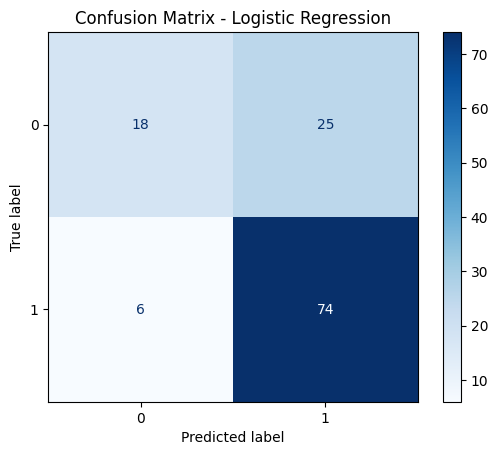

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [25]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7154471544715447
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.40      0.49        43
           1       0.73      0.89      0.80        80

    accuracy                           0.72       123
   macro avg       0.69      0.64      0.65       123
weighted avg       0.70      0.72      0.69       123

